# Dadar and Nagara Haveli and Daman and Diu

In [23]:
import pandas as pd

# Load the datasets for Dadra and Nagar Haveli
df_dnh_enrolment = pd.read_csv('/content/Dadra&Nagar Haveli Enrolment State.csv')
df_dnh_demographic = pd.read_csv('/content/Dadra&Nagar Haveli Demographic State.csv')
df_dnh_biometric = pd.read_csv('/content/Dadra&Nagar Haveli Biometric State.csv')

# Load the datasets for Daman and Diu
df_dd_enrolment = pd.read_csv('/content/Daman&Diu Enrolment State.csv')
df_dd_demographic = pd.read_csv('/content/Daman&Diu Demographic State.csv')
df_dd_biometric = pd.read_csv('/content/Daman&Diu Biometric State.csv')

print("Dadra and Nagar Haveli Enrolment Dataset:")
print(df_dnh_enrolment.head())
print(df_dnh_enrolment.info())
print(df_dnh_enrolment.describe())

print("\nDadra and Nagar Haveli Demographic Dataset:")
print(df_dnh_demographic.head())
print(df_dnh_demographic.info())
print(df_dnh_demographic.describe())

print("\nDadra and Nagar Haveli Biometric Dataset:")
print(df_dnh_biometric.head())
print(df_dnh_biometric.info())
print(df_dnh_biometric.describe())

print("\nDaman and Diu Enrolment Dataset:")
print(df_dd_enrolment.head())
print(df_dd_enrolment.info())
print(df_dd_enrolment.describe())

print("\nDaman and Diu Demographic Dataset:")
print(df_dd_demographic.head())
print(df_dd_demographic.info())
print(df_dd_demographic.describe())

print("\nDaman and Diu Biometric Dataset:")
print(df_dd_biometric.head())
print(df_dd_biometric.info())
print(df_dd_biometric.describe())

Dadra and Nagar Haveli Enrolment Dataset:
         date                   state                district  pincode  \
0  08-09-2025  Dadra and Nagar Haveli  Dadra and Nagar Haveli   396230   
1  09-09-2025  Dadra and Nagar Haveli  Dadra and Nagar Haveli   396230   
2  11-09-2025  Dadra and Nagar Haveli  Dadra and Nagar Haveli   396235   
3  20-09-2025  Dadra and Nagar Haveli  Dadra and Nagar Haveli   396240   
4  19-09-2025  Dadra and Nagar Haveli  Dadra and Nagar Haveli   396235   

   age_0_5  age_5_17  age_18_greater  
0       13         0               1  
1       18         1               0  
2        5         0               0  
3        1         0               0  
4        3         0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            198 non-null    object
 1   state           198 non-null    object

In [24]:
df_dnh_enrolment['date'] = pd.to_datetime(df_dnh_enrolment['date'], format='%d-%m-%Y')
df_dnh_demographic['date'] = pd.to_datetime(df_dnh_demographic['date'], format='%d-%m-%Y')
df_dnh_biometric['date'] = pd.to_datetime(df_dnh_biometric['date'], format='%d-%m-%Y')

df_dd_enrolment['date'] = pd.to_datetime(df_dd_enrolment['date'], format='%d-%m-%Y')
df_dd_demographic['date'] = pd.to_datetime(df_dd_demographic['date'], format='%d-%m-%Y')
df_dd_biometric['date'] = pd.to_datetime(df_dd_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_dnh_enrolment:")
print(df_dnh_enrolment.info())
print("\nData types after conversion for df_dnh_demographic:")
print(df_dnh_demographic.info())
print("\nData types after conversion for df_dnh_biometric:")
print(df_dnh_biometric.info())

print("\nData types after conversion for df_dd_enrolment:")
print(df_dd_enrolment.info())
print("\nData types after conversion for df_dd_demographic:")
print(df_dd_demographic.info())
print("\nData types after conversion for df_dd_biometric:")
print(df_dd_biometric.info())

Data types after conversion for df_dnh_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            198 non-null    datetime64[ns]
 1   state           198 non-null    object        
 2   district        198 non-null    object        
 3   pincode         198 non-null    int64         
 4   age_0_5         198 non-null    int64         
 5   age_5_17        198 non-null    int64         
 6   age_18_greater  198 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 11.0+ KB
None

Data types after conversion for df_dnh_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           110 non-null    datetime

In [25]:
merged_dnh_df_temp = pd.merge(df_dnh_enrolment, df_dnh_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_dnh_merged = pd.merge(merged_dnh_df_temp, df_dnh_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

merged_dd_df_temp = pd.merge(df_dd_enrolment, df_dd_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_dd_merged = pd.merge(merged_dd_df_temp, df_dd_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')


# Identify numeric columns for NaN filling in DNH
numeric_cols_dnh = df_dnh_merged.select_dtypes(include=['number']).columns
# Replace NaN values in numerical columns with 0
df_dnh_merged[numeric_cols_dnh] = df_dnh_merged[numeric_cols_dnh].fillna(0)

# Identify numeric columns for NaN filling in DD
numeric_cols_dd = df_dd_merged.select_dtypes(include=['number']).columns
# Replace NaN values in numerical columns with 0
df_dd_merged[numeric_cols_dd] = df_dd_merged[numeric_cols_dd].fillna(0)


print("Merged Dadra and Nagar Haveli DataFrame (df_dnh_merged) head:")
print(df_dnh_merged.head())
print("\nMerged Dadra and Nagar Haveli DataFrame (df_dnh_merged) info:")
print(df_dnh_merged.info())
print("\nMerged Daman and Diu DataFrame (df_dd_merged) head:")
print(df_dd_merged.head())
print("\nMerged Daman and Diu DataFrame (df_dd_merged) info:")
print(df_dd_merged.info())

Merged Dadra and Nagar Haveli DataFrame (df_dnh_merged) head:
        date                   state                district  pincode  \
0 2025-03-01  Dadra and Nagar Haveli  Dadra and Nagar Haveli   396193   
1 2025-03-01  Dadra and Nagar Haveli  Dadra and Nagar Haveli   396230   
2 2025-03-01  Dadra and Nagar Haveli  Dadra and Nagar Haveli   396235   
3 2025-03-01  Dadra and Nagar Haveli  Dadra and Nagar Haveli   396240   
4 2025-04-01  Dadra and Nagar Haveli  Dadra and Nagar Haveli   396193   

   age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0      0.0       0.0             0.0            0.0           0.0   
1      0.0       0.0             0.0            0.0           0.0   
2      0.0       0.0             0.0            0.0           0.0   
3      0.0       0.0             0.0            0.0           0.0   
4      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0          39.0         71.0  
1         732.0       

In [26]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_dnh = df_dnh_merged[df_dnh_merged['state'].isin(['Dadra and Nagar Haveli', 'Dadra & Nagar Haveli'])].copy()
df_dnh['year'] = df_dnh['date'].dt.year
df_dnh['month'] = df_dnh['date'].dt.month
df_dnh_agg = df_dnh.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

df_dd = df_dd_merged[df_dd_merged['state'] == 'Daman and Diu'].copy()
df_dd['year'] = df_dd['date'].dt.year
df_dd['month'] = df_dd['date'].dt.month
df_dd_agg = df_dd.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated Dadra and Nagar Haveli DataFrame (df_dnh_agg) head:")
print(df_dnh_agg.head())
print("\nAggregated Dadra and Nagar Haveli DataFrame (df_dnh_agg) info:")
print(df_dnh_agg.info())

print("\nAggregated Daman and Diu DataFrame (df_dd_agg) head:")
print(df_dd_agg.head())
print("\nAggregated Daman and Diu DataFrame (df_dd_agg) info:")
print(df_dd_agg.info())

Aggregated Dadra and Nagar Haveli DataFrame (df_dnh_agg) head:
   year  month                   state                district  age_0_5  \
0  2025      3  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
1  2025      4  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
2  2025      5  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
3  2025      6  Dadra and Nagar Haveli  Dadra and Nagar Haveli     79.0   
4  2025      7  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   

   age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  \
0       0.0             0.0            0.0           0.0         932.0   
1       0.0             0.0            0.0           0.0        1320.0   
2       0.0             0.0            0.0           0.0        2077.0   
3      40.0             0.0            0.0           0.0        1192.0   
4       0.0             0.0            0.0           0.0         843.0   

   bio_age_17_  
0       2268.0  
1      

In [27]:
import numpy as np

# --- For Dadra and Nagar Haveli (df_dnh_agg) ---
# 1. Create 'totalenrolments' column
df_dnh_agg['totalenrolments'] = df_dnh_agg['age_0_5'] + df_dnh_agg['age_5_17'] + df_dnh_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_dnh_agg['childenrolments'] = df_dnh_agg['age_0_5'] + df_dnh_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_dnh_agg['totaldemoupdates'] = df_dnh_agg['demo_age_5_17'] + df_dnh_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_dnh_agg['totalbioupdates'] = df_dnh_agg['bio_age_5_17'] + df_dnh_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_dnh_agg['CES'] = np.where(
    df_dnh_agg['totalenrolments'] == 0,
    0,
    df_dnh_agg['childenrolments'] / df_dnh_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_dnh_agg['DUR'] = np.where(
    df_dnh_agg['totalenrolments'] == 0,
    0,
    df_dnh_agg['totaldemoupdates'] / df_dnh_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_dnh_agg['BUR'] = np.where(
    df_dnh_agg['totalenrolments'] == 0,
    0,
    df_dnh_agg['totalbioupdates'] / df_dnh_agg['totalenrolments']
)

# --- For Daman and Diu (df_dd_agg) ---
# 1. Create 'totalenrolments' column
df_dd_agg['totalenrolments'] = df_dd_agg['age_0_5'] + df_dd_agg['age_5_17'] + df_dd_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_dd_agg['childenrolments'] = df_dd_agg['age_0_5'] + df_dd_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_dd_agg['totaldemoupdates'] = df_dd_agg['demo_age_5_17'] + df_dd_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_dd_agg['totalbioupdates'] = df_dd_agg['bio_age_5_17'] + df_dd_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_dd_agg['CES'] = np.where(
    df_dd_agg['totalenrolments'] == 0,
    0,
    df_dd_agg['childenrolments'] / df_dd_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_dd_agg['DUR'] = np.where(
    df_dd_agg['totalenrolments'] == 0,
    0,
    df_dd_agg['totaldemoupdates'] / df_dd_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_dd_agg['BUR'] = np.where(
    df_dd_agg['totalenrolments'] == 0,
    0,
    df_dd_agg['totalbioupdates'] / df_dd_agg['totalenrolments']
)

# 8. Display the head of both DataFrames
print("Aggregated Dadra and Nagar Haveli DataFrame (df_dnh_agg) with new metrics head:")
print(df_dnh_agg.head())

print("\nAggregated Daman and Diu DataFrame (df_dd_agg) with new metrics head:")
print(df_dd_agg.head())

Aggregated Dadra and Nagar Haveli DataFrame (df_dnh_agg) with new metrics head:
   year  month                   state                district  age_0_5  \
0  2025      3  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
1  2025      4  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
2  2025      5  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
3  2025      6  Dadra and Nagar Haveli  Dadra and Nagar Haveli     79.0   
4  2025      7  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   

   age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  \
0       0.0             0.0            0.0           0.0         932.0   
1       0.0             0.0            0.0           0.0        1320.0   
2       0.0             0.0            0.0           0.0        2077.0   
3      40.0             0.0            0.0           0.0        1192.0   
4       0.0             0.0            0.0           0.0         843.0   

   bio_age_17_  totalenr

In [28]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# --- For Dadra and Nagar Haveli (df_dnh_agg) ---
# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_dnh_agg['Enorm'] = df_dnh_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_dnh_agg['Dnorm'] = df_dnh_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_dnh_agg['Bnorm'] = df_dnh_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_dnh_agg['stdnorm'] = (df_dnh_agg['Enorm'] + df_dnh_agg['Dnorm'] + df_dnh_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_dnh_agg['ALBI'] = 1 - df_dnh_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_dnh_agg['ALBI'] = df_dnh_agg['ALBI'].clip(lower=0, upper=1)

# --- For Daman and Diu (df_dd_agg) ---
# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_dd_agg['Enorm'] = df_dd_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_dd_agg['Dnorm'] = df_dd_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_dd_agg['Bnorm'] = df_dd_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_dd_agg['stdnorm'] = (df_dd_agg['Enorm'] + df_dd_agg['Dnorm'] + df_dd_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_dd_agg['ALBI'] = 1 - df_dd_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_dd_agg['ALBI'] = df_dd_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of both DataFrames to show the newly created columns
print("Aggregated Dadra and Nagar Haveli DataFrame (df_dnh_agg) with normalized metrics and ALBI head:")
print(df_dnh_agg.head())

print("\nAggregated Daman and Diu DataFrame (df_dd_agg) with normalized metrics and ALBI head:")
print(df_dd_agg.head())

Aggregated Dadra and Nagar Haveli DataFrame (df_dnh_agg) with normalized metrics and ALBI head:
   year  month                   state                district  age_0_5  \
0  2025      3  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
1  2025      4  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
2  2025      5  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
3  2025      6  Dadra and Nagar Haveli  Dadra and Nagar Haveli     79.0   
4  2025      7  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   

   age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...  \
0       0.0             0.0            0.0           0.0         932.0  ...   
1       0.0             0.0            0.0           0.0        1320.0  ...   
2       0.0             0.0            0.0           0.0        2077.0  ...   
3      40.0             0.0            0.0           0.0        1192.0  ...   
4       0.0             0.0            0.0           0.0  

In [29]:
df_dnh_agg['Enormrisk'] = 1 - df_dnh_agg['Enorm']
df_dnh_agg['CESrisknorm'] = 1 - df_dnh_agg['CES']
df_dnh_agg['DURrisknorm'] = 1 - df_dnh_agg['DUR']
df_dnh_agg['BURrisknorm'] = 1 - df_dnh_agg['BUR']
df_dnh_agg['ALBIrisknorm'] = 1 - df_dnh_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_dnh_agg['riskscore'] = (
    df_dnh_agg['Enormrisk'] +
    df_dnh_agg['CESrisknorm'] +
    df_dnh_agg['DURrisknorm'] +
    df_dnh_agg['BURrisknorm'] +
    df_dnh_agg['ALBIrisknorm']
) / 5 * 100

df_dd_agg['Enormrisk'] = 1 - df_dd_agg['Enorm']
df_dd_agg['CESrisknorm'] = 1 - df_dd_agg['CES']
df_dd_agg['DURrisknorm'] = 1 - df_dd_agg['DUR']
df_dd_agg['BURrisknorm'] = 1 - df_dd_agg['BUR']
df_dd_agg['ALBIrisknorm'] = 1 - df_dd_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_dd_agg['riskscore'] = (
    df_dd_agg['Enormrisk'] +
    df_dd_agg['CESrisknorm'] +
    df_dd_agg['DURrisknorm'] +
    df_dd_agg['BURrisknorm'] +
    df_dd_agg['ALBIrisknorm']
) / 5 * 100

print("Aggregated Dadra and Nagar Haveli DataFrame (df_dnh_agg) with risk components and riskscore head:")
print(df_dnh_agg.head())

print("\nAggregated Daman and Diu DataFrame (df_dd_agg) with risk components and riskscore head:")
print(df_dd_agg.head())

Aggregated Dadra and Nagar Haveli DataFrame (df_dnh_agg) with risk components and riskscore head:
   year  month                   state                district  age_0_5  \
0  2025      3  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
1  2025      4  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
2  2025      5  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
3  2025      6  Dadra and Nagar Haveli  Dadra and Nagar Haveli     79.0   
4  2025      7  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   

   age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...  \
0       0.0             0.0            0.0           0.0         932.0  ...   
1       0.0             0.0            0.0           0.0        1320.0  ...   
2       0.0             0.0            0.0           0.0        2077.0  ...   
3      40.0             0.0            0.0           0.0        1192.0  ...   
4       0.0             0.0            0.0           0.0

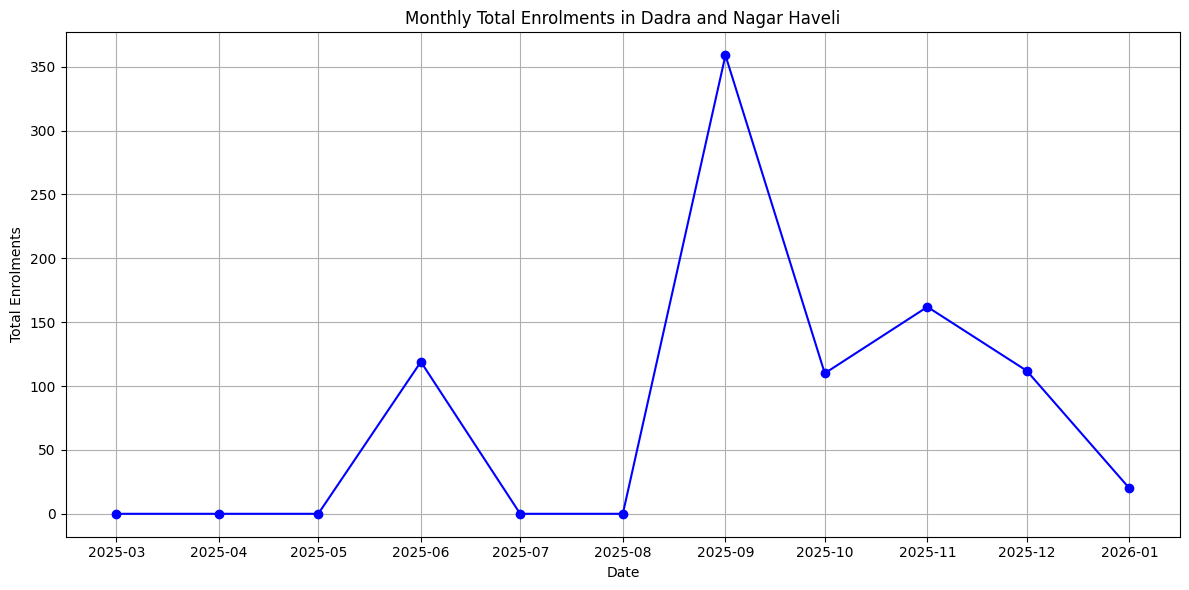

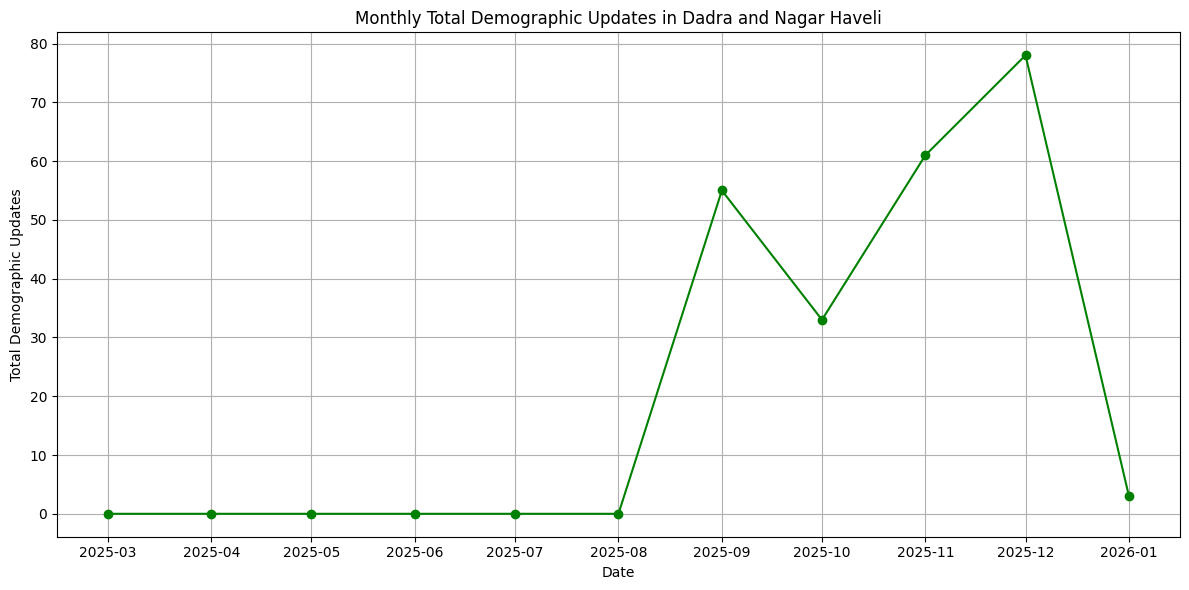

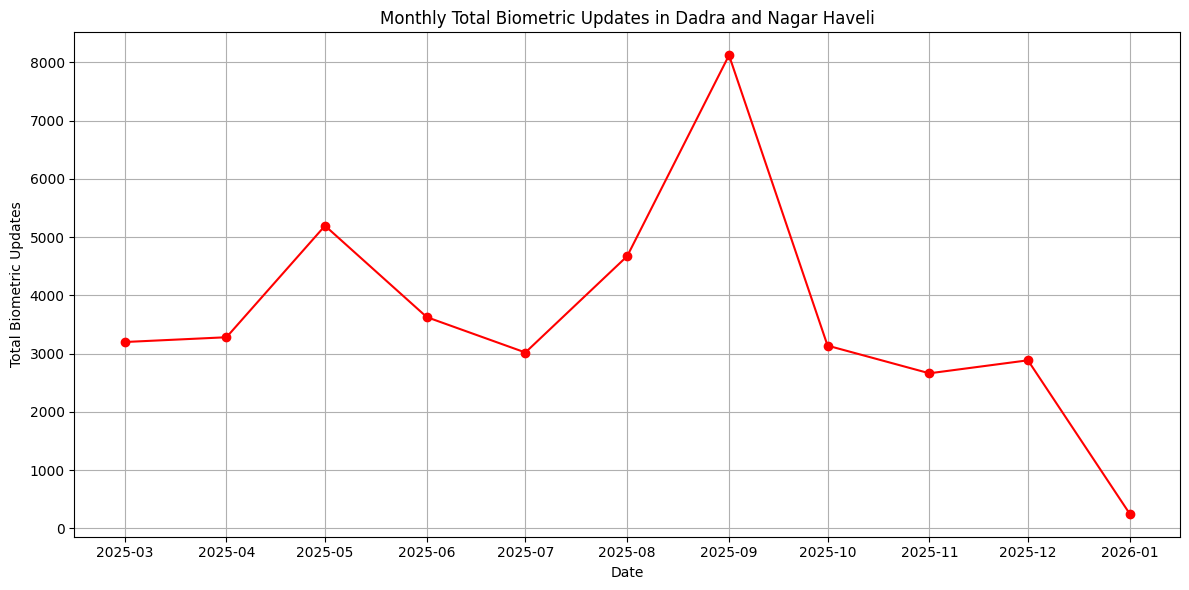

Monthly trend plots generated successfully for Dadra and Nagar Haveli.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

df_dnh_monthly_trends = df_dnh_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_dnh_monthly_trends['date'] = pd.to_datetime(df_dnh_monthly_trends['year'].astype(str) + '-' + df_dnh_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_dnh_monthly_trends = df_dnh_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_dnh_monthly_trends['date'], df_dnh_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Dadra and Nagar Haveli')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_dnh_monthly_trends['date'], df_dnh_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Dadra and Nagar Haveli')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_dnh_monthly_trends['date'], df_dnh_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Dadra and Nagar Haveli')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully for Dadra and Nagar Haveli.")

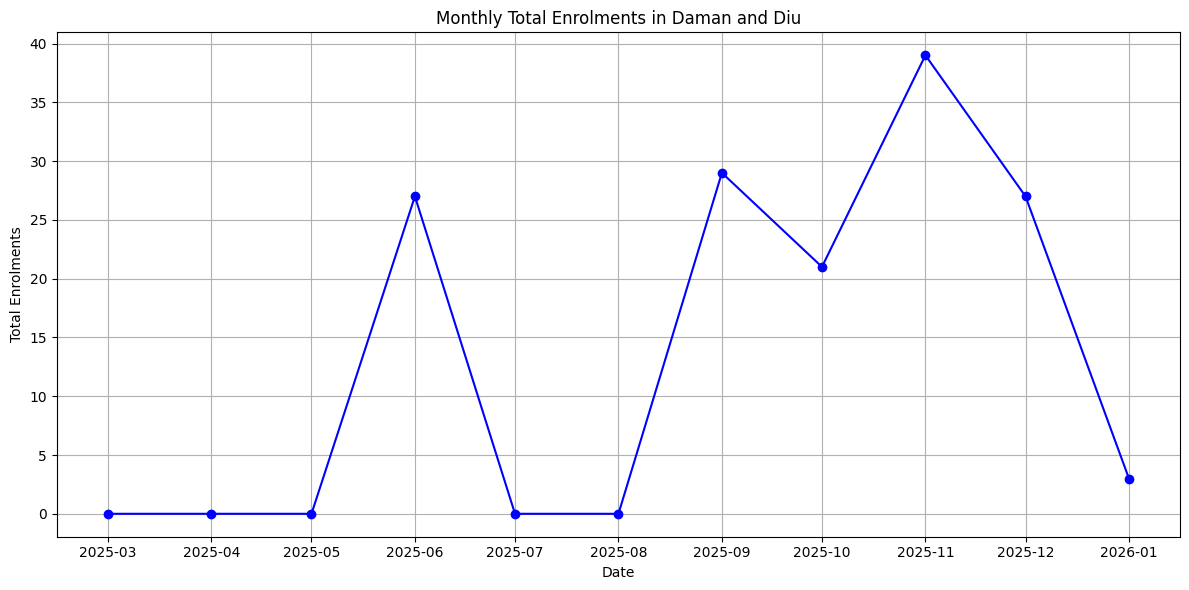

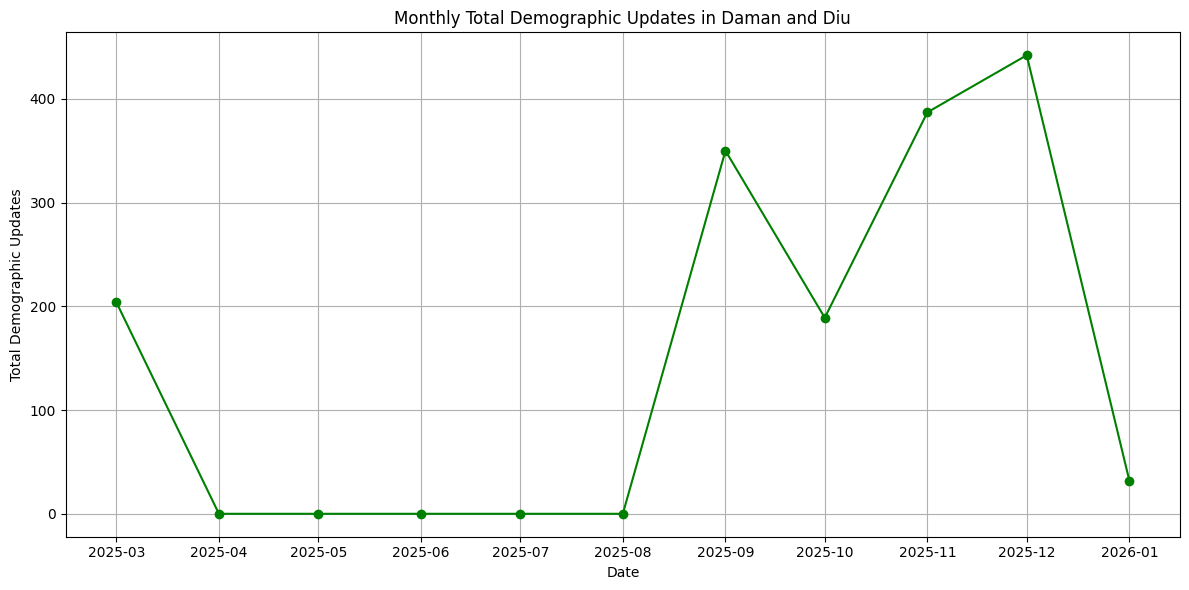

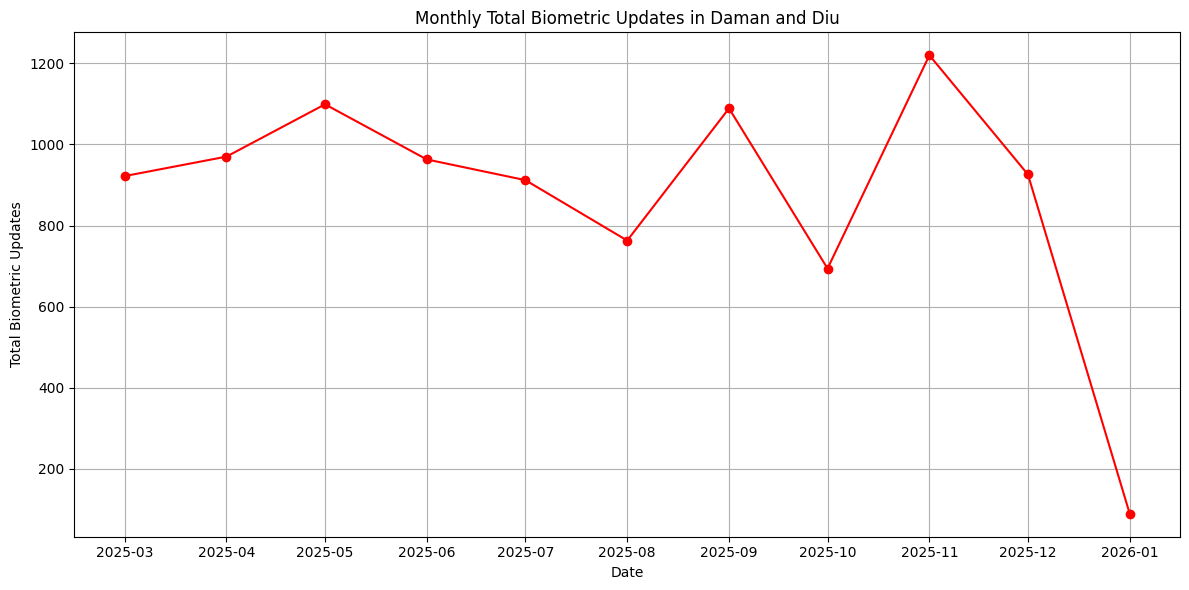

Monthly trend plots generated successfully for Daman and Diu.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

df_dd_monthly_trends = df_dd_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_dd_monthly_trends['date'] = pd.to_datetime(df_dd_monthly_trends['year'].astype(str) + '-' + df_dd_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_dd_monthly_trends = df_dd_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_dd_monthly_trends['date'], df_dd_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Daman and Diu')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_dd_monthly_trends['date'], df_dd_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Daman and Diu')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_dd_monthly_trends['date'], df_dd_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Daman and Diu')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully for Daman and Diu.")

**Univariate Analysis**

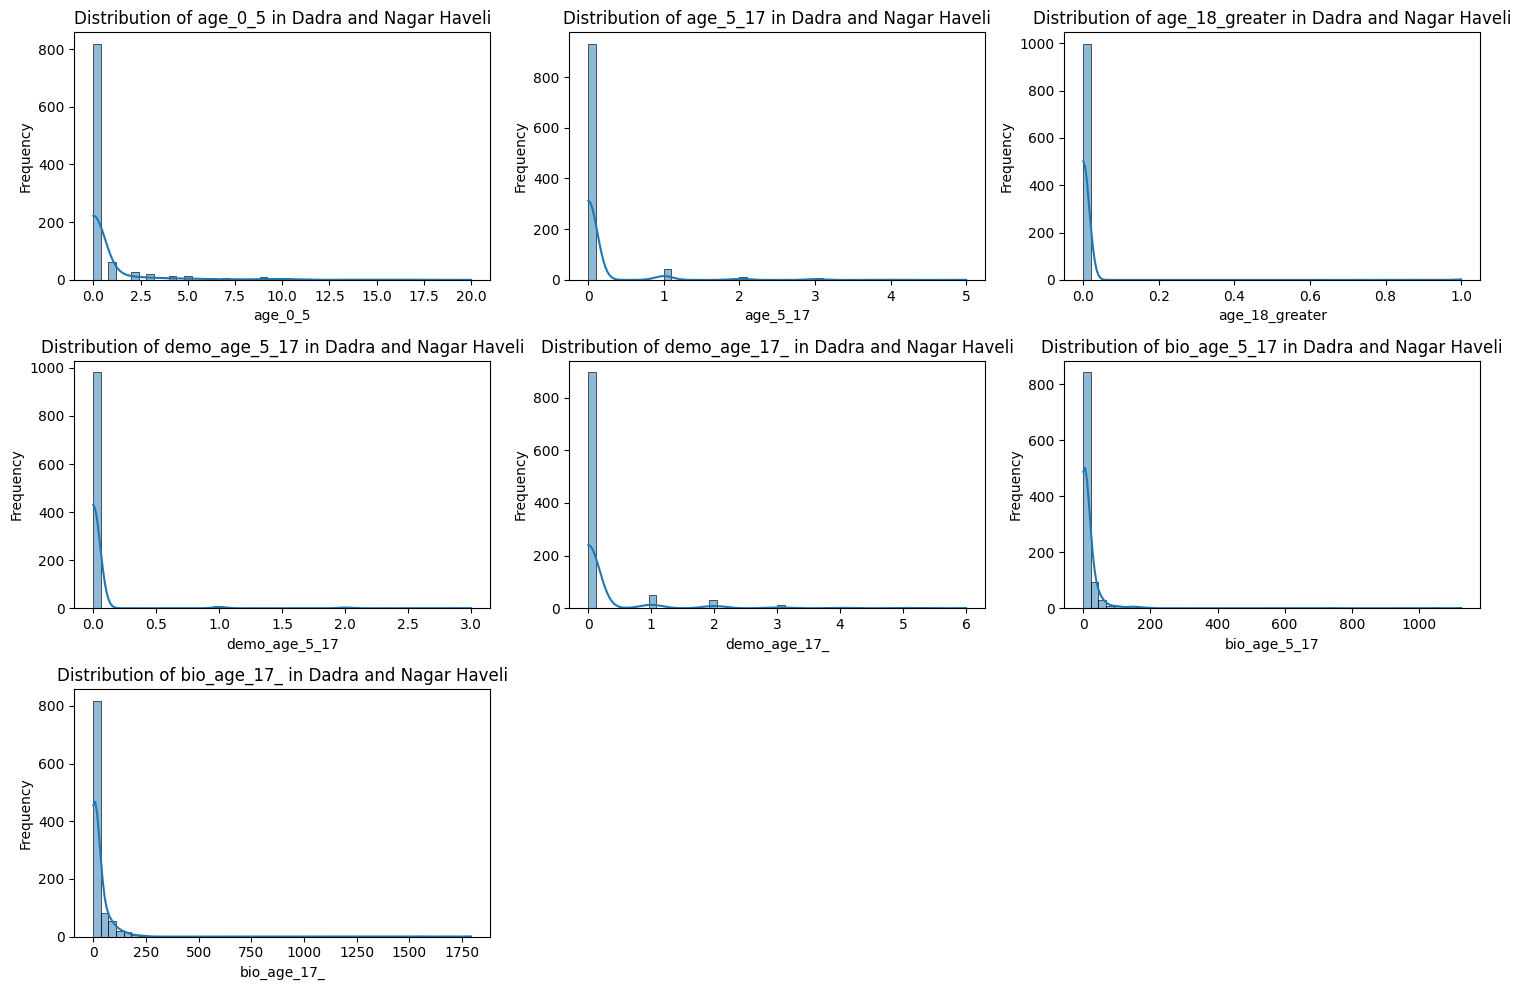

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_dnh_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Dadra and Nagar Haveli')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

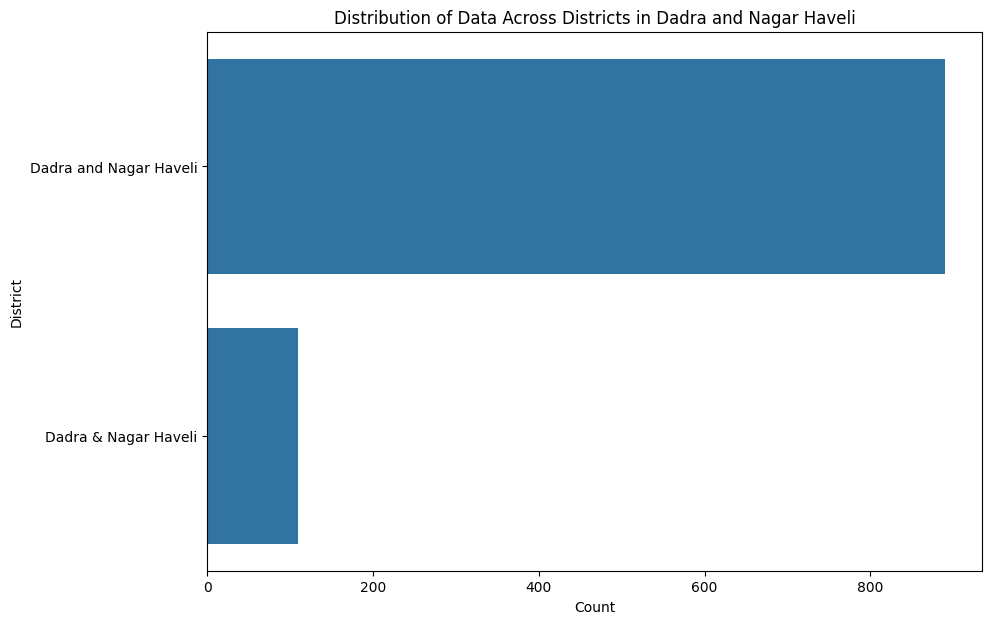

Histograms for numerical age-related columns and count plot for 'district' displayed for Dadra and Nagar Haveli.


In [45]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_dnh_merged, y='district', order=df_dnh_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Dadra and Nagar Haveli')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Dadra and Nagar Haveli.")

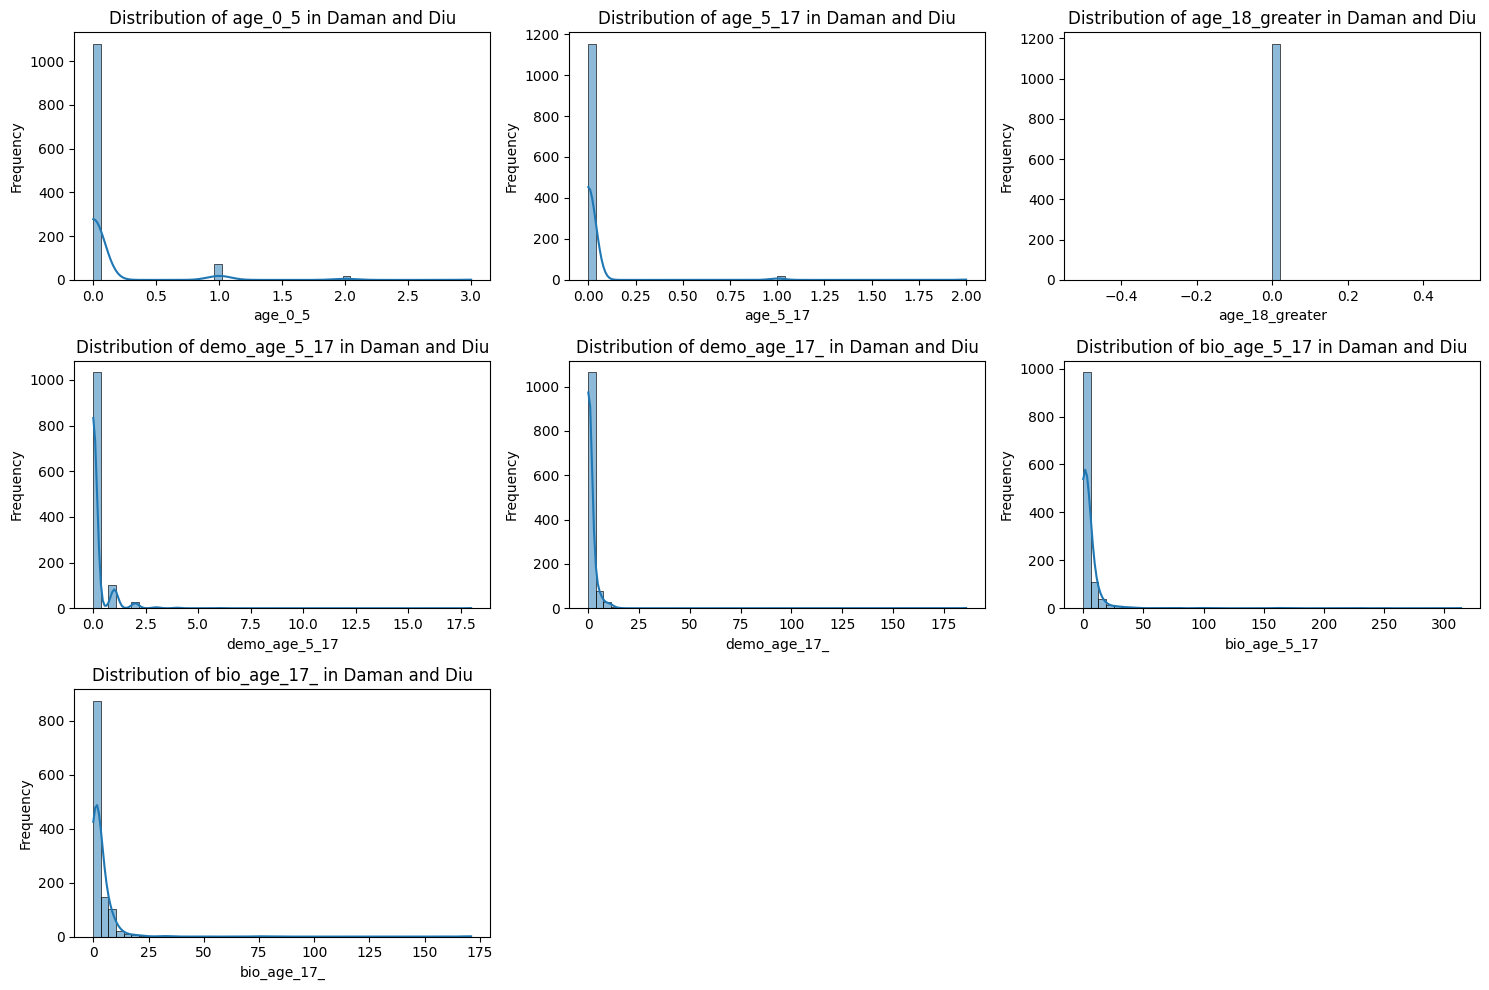

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_dd_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Daman and Diu')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

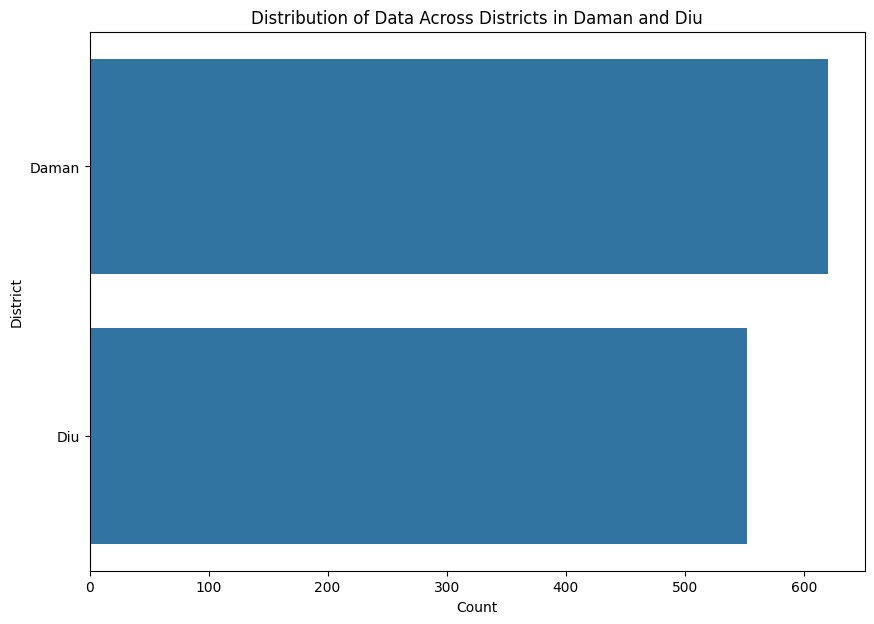

Histograms for numerical age-related columns and count plot for 'district' displayed for Daman and Diu.


In [49]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_dd_merged, y='district', order=df_dd_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Daman and Diu')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Daman and Diu.")

Bivariate and Trivariate Analysis (Dadra and Nagar Haveli)

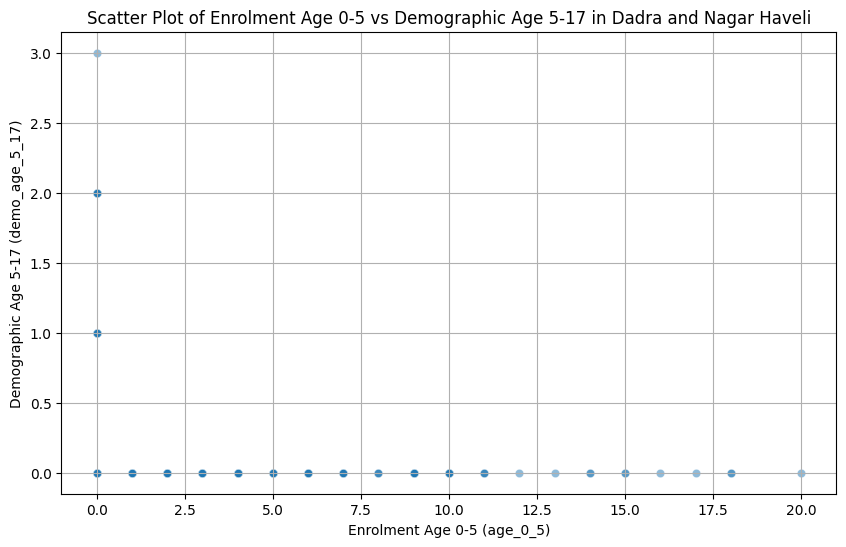

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Dadra and Nagar Haveli.


In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dnh_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 in Dadra and Nagar Haveli')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Dadra and Nagar Haveli.")

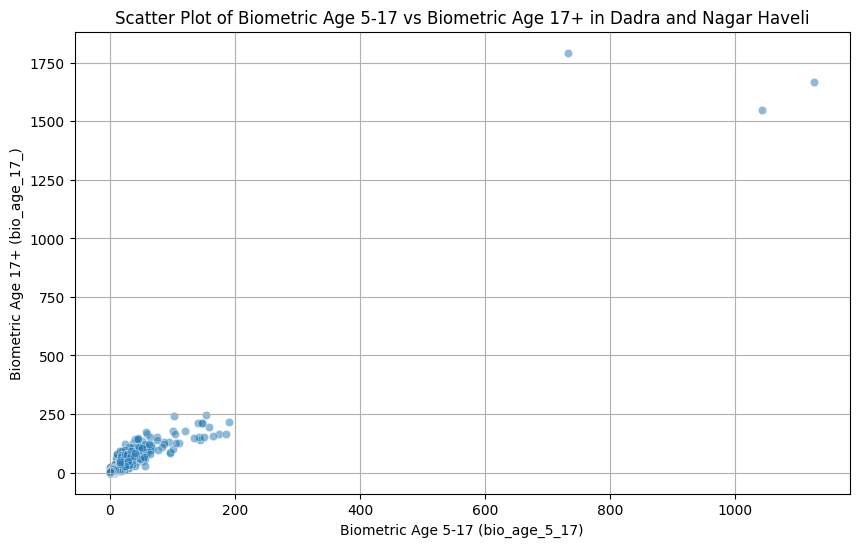

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Dadra and Nagar Haveli.


In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dnh_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ in Dadra and Nagar Haveli')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Dadra and Nagar Haveli.")

Correlation Matrix for Dadra and Nagar Haveli:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.503294        0.132773      -0.041555   
age_5_17        0.503294  1.000000        0.052241      -0.030311   
age_18_greater  0.132773  0.052241        1.000000      -0.008166   
demo_age_5_17  -0.041555 -0.030311       -0.008166       1.000000   
demo_age_17_   -0.091832 -0.066983       -0.018046       0.203349   
bio_age_5_17    0.198389  0.131115        0.014442      -0.032100   
bio_age_17_     0.141415  0.095167        0.001093      -0.033781   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5            -0.091832      0.198389     0.141415  
age_5_17           -0.066983      0.131115     0.095167  
age_18_greater     -0.018046      0.014442     0.001093  
demo_age_5_17       0.203349     -0.032100    -0.033781  
demo_age_17_        1.000000     -0.070937    -0.074651  
bio_age_5_17       -0.070937      1.000000     0.962

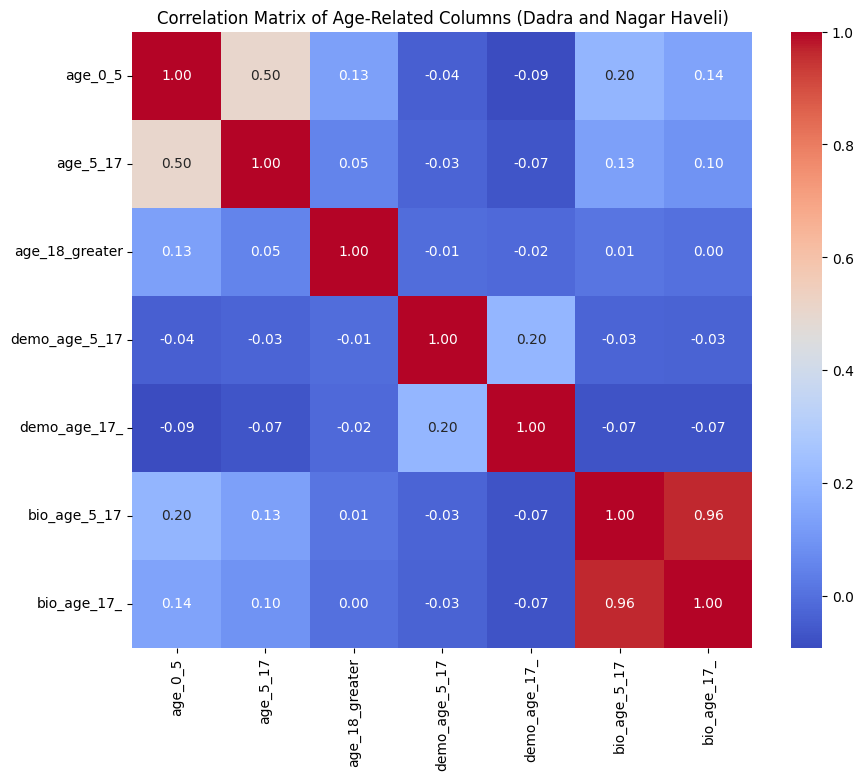

Correlation matrix heatmap for age-related columns displayed for Dadra and Nagar Haveli.


In [36]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_dnh = df_dnh_merged[numerical_age_cols].corr()

print("Correlation Matrix for Dadra and Nagar Haveli:")
print(correlation_matrix_dnh)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_dnh, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Dadra and Nagar Haveli)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Dadra and Nagar Haveli.")

 Bivariate and Trivariate Analysis (Daman and Diu)

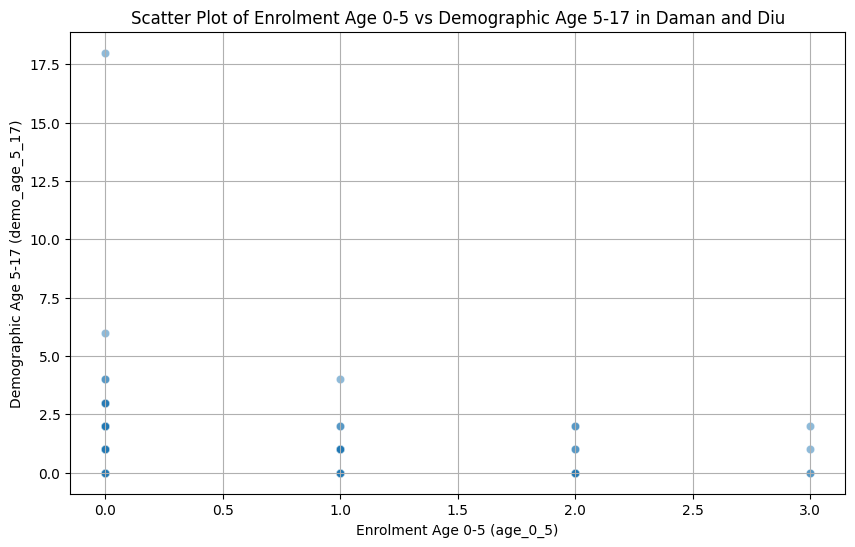

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Daman and Diu.


In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dd_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 in Daman and Diu')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Daman and Diu.")

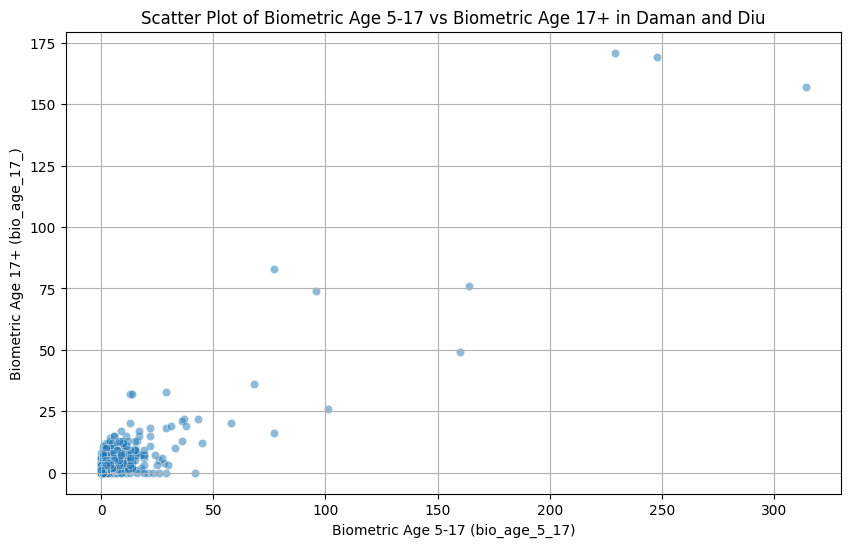

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Daman and Diu.


In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dd_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ in Daman and Diu')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Daman and Diu.")

Correlation Matrix for Daman and Diu:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.166914             NaN       0.063119   
age_5_17        0.166914  1.000000             NaN      -0.016938   
age_18_greater       NaN       NaN             NaN            NaN   
demo_age_5_17   0.063119 -0.016938             NaN       1.000000   
demo_age_17_    0.056675 -0.001592             NaN       0.796625   
bio_age_5_17    0.005674 -0.008895             NaN       0.333144   
bio_age_17_     0.001298  0.003177             NaN       0.384076   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.056675      0.005674     0.001298  
age_5_17           -0.001592     -0.008895     0.003177  
age_18_greater           NaN           NaN          NaN  
demo_age_5_17       0.796625      0.333144     0.384076  
demo_age_17_        1.000000      0.415835     0.480806  
bio_age_5_17        0.415835      1.000000     0.909593  
bio

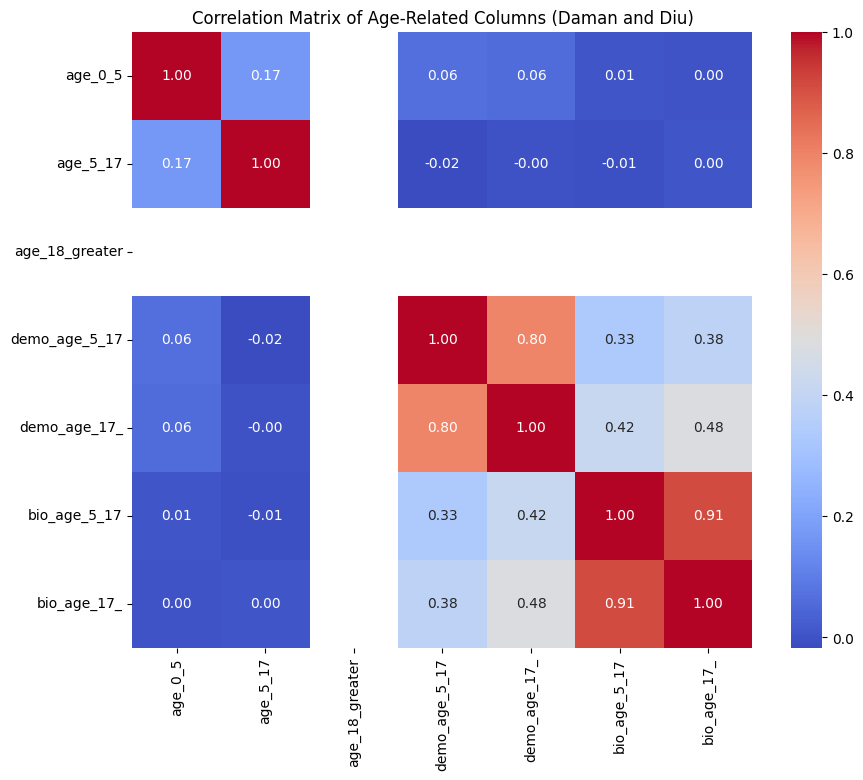

Correlation matrix heatmap for age-related columns displayed for Daman and Diu.


In [39]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_dd = df_dd_merged[numerical_age_cols].corr()

print("Correlation Matrix for Daman and Diu:")
print(correlation_matrix_dd)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_dd, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Daman and Diu)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Daman and Diu.")

In [50]:
import pandas as pd

# 1. Find the latest year and month for Dadra and Nagar Haveli
latest_year_dnh = df_dnh_agg['year'].max()
latest_month_dnh = df_dnh_agg[df_dnh_agg['year'] == latest_year_dnh]['month'].max()

print(f"Latest reporting period for Dadra and Nagar Haveli: Year {latest_year_dnh}, Month {latest_month_dnh}")

# 2. Filter df_dnh_agg for the latest year and month
df_latest_month_dnh = df_dnh_agg[(df_dnh_agg['year'] == latest_year_dnh) & (df_dnh_agg['month'] == latest_month_dnh)].copy()

# Metrics to analyze
metrics_dnh = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics_dnh:
    print(f"\n--- Metric: {metric} ---")

    # Top districts
    # For riskscore, top implies highest risk (descending)
    # For ALBI, top implies best balance (descending)
    # For CES, DUR, BUR, top implies best performance (descending)
    top_10_dnh = df_latest_month_dnh.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop Districts by {metric} (Year {latest_year_dnh}, Month {latest_month_dnh}):")
    print(top_10_dnh[['district', metric]].to_string(index=False))

    # Bottom districts
    # For riskscore, bottom implies lowest risk (ascending)
    # For ALBI, bottom implies least balance (ascending)
    # For CES, DUR, BUR, bottom implies worst performance (ascending)
    bottom_10_dnh = df_latest_month_dnh.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom Districts by {metric} (Year {latest_year_dnh}, Month {latest_month_dnh}):")
    print(bottom_10_dnh[['district', metric]].to_string(index=False))

Latest reporting period for Dadra and Nagar Haveli: Year 2026, Month 1

--- Metric: CES ---

Top Districts by CES (Year 2026, Month 1):
              district  CES
Dadra and Nagar Haveli  1.0
  Dadra & Nagar Haveli  0.0

Bottom Districts by CES (Year 2026, Month 1):
              district  CES
  Dadra & Nagar Haveli  0.0
Dadra and Nagar Haveli  1.0

--- Metric: DUR ---

Top Districts by DUR (Year 2026, Month 1):
              district  DUR
  Dadra & Nagar Haveli  0.0
Dadra and Nagar Haveli  0.0

Bottom Districts by DUR (Year 2026, Month 1):
              district  DUR
  Dadra & Nagar Haveli  0.0
Dadra and Nagar Haveli  0.0

--- Metric: BUR ---

Top Districts by BUR (Year 2026, Month 1):
              district   BUR
Dadra and Nagar Haveli 12.55
  Dadra & Nagar Haveli  0.00

Bottom Districts by BUR (Year 2026, Month 1):
              district   BUR
  Dadra & Nagar Haveli  0.00
Dadra and Nagar Haveli 12.55

--- Metric: ALBI ---

Top Districts by ALBI (Year 2026, Month 1):
              di

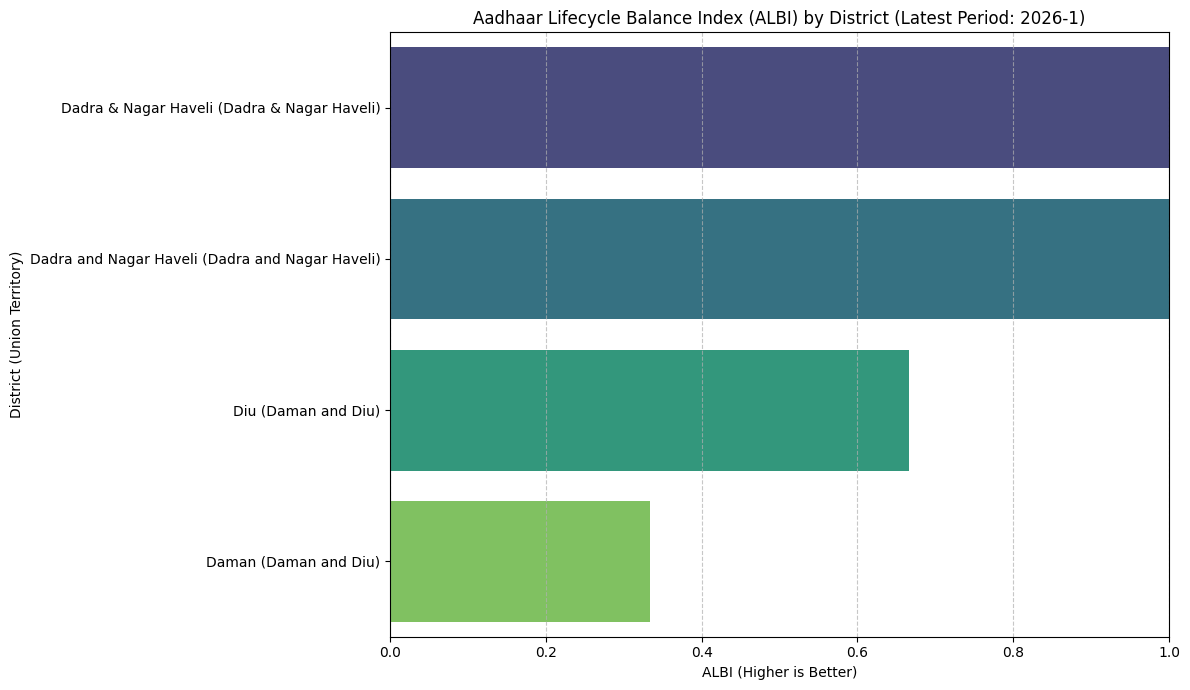

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine district and state for unique labels on the plot
df_latest_month_dnh_dd['district_state'] = df_latest_month_dnh_dd['district'] + ' (' + df_latest_month_dnh_dd['state'] + ')'

# Sort the DataFrame by ALBI in descending order to show top performers first
df_plot = df_latest_month_dnh_dd.sort_values(by='ALBI', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(data=df_plot, x='ALBI', y='district_state', palette='viridis')
plt.title(f'Aadhaar Lifecycle Balance Index (ALBI) by District (Latest Period: {latest_year}-{latest_month})')
plt.xlabel('ALBI (Higher is Better)')
plt.ylabel('District (Union Territory)')
plt.xlim(0, 1) # ALBI is clamped between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd

# 1. Find the latest year and month for Daman and Diu
latest_year_dd = df_dd_agg['year'].max()
latest_month_dd = df_dd_agg[df_dd_agg['year'] == latest_year_dd]['month'].max()

print(f"Latest reporting period for Daman and Diu: Year {latest_year_dd}, Month {latest_month_dd}")

# 2. Filter df_dd_agg for the latest year and month
df_latest_month_dd = df_dd_agg[(df_dd_agg['year'] == latest_year_dd) & (df_dd_agg['month'] == latest_month_dd)].copy()

# Metrics to analyze
metrics_dd = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics_dd:
    print(f"\n--- Metric: {metric} ---")

    # Top districts
    # For riskscore, top implies highest risk (descending)
    # For ALBI, top implies best balance (descending)
    # For CES, DUR, BUR, top implies best performance (descending)
    top_10_dd = df_latest_month_dd.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop Districts by {metric} (Year {latest_year_dd}, Month {latest_month_dd}):")
    print(top_10_dd[['district', metric]].to_string(index=False))

    # Bottom districts
    # For riskscore, bottom implies lowest risk (ascending)
    # For ALBI, bottom implies least balance (ascending)
    # For CES, DUR, BUR, bottom implies worst performance (ascending)
    bottom_10_dd = df_latest_month_dd.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom Districts by {metric} (Year {latest_year_dd}, Month {latest_month_dd}):")
    print(bottom_10_dd[['district', metric]].to_string(index=False))

Latest reporting period for Daman and Diu: Year 2026, Month 1

--- Metric: CES ---

Top Districts by CES (Year 2026, Month 1):
district  CES
   Daman  1.0
     Diu  1.0

Bottom Districts by CES (Year 2026, Month 1):
district  CES
   Daman  1.0
     Diu  1.0

--- Metric: DUR ---

Top Districts by DUR (Year 2026, Month 1):
district  DUR
   Daman 23.0
     Diu  4.5

Bottom Districts by DUR (Year 2026, Month 1):
district  DUR
     Diu  4.5
   Daman 23.0

--- Metric: BUR ---

Top Districts by BUR (Year 2026, Month 1):
district  BUR
   Daman 72.0
     Diu  8.5

Bottom Districts by BUR (Year 2026, Month 1):
district  BUR
     Diu  8.5
   Daman 72.0

--- Metric: ALBI ---

Top Districts by ALBI (Year 2026, Month 1):
district     ALBI
     Diu 0.666667
   Daman 0.333333

Bottom Districts by ALBI (Year 2026, Month 1):
district     ALBI
   Daman 0.333333
     Diu 0.666667

--- Metric: riskscore ---

Top Districts by riskscore (Year 2026, Month 1):
district    riskscore
     Diu  -213.333333
   Dam

Time-series aggregated data (sum of age-related columns per date) for Dadra and Nagar Haveli :


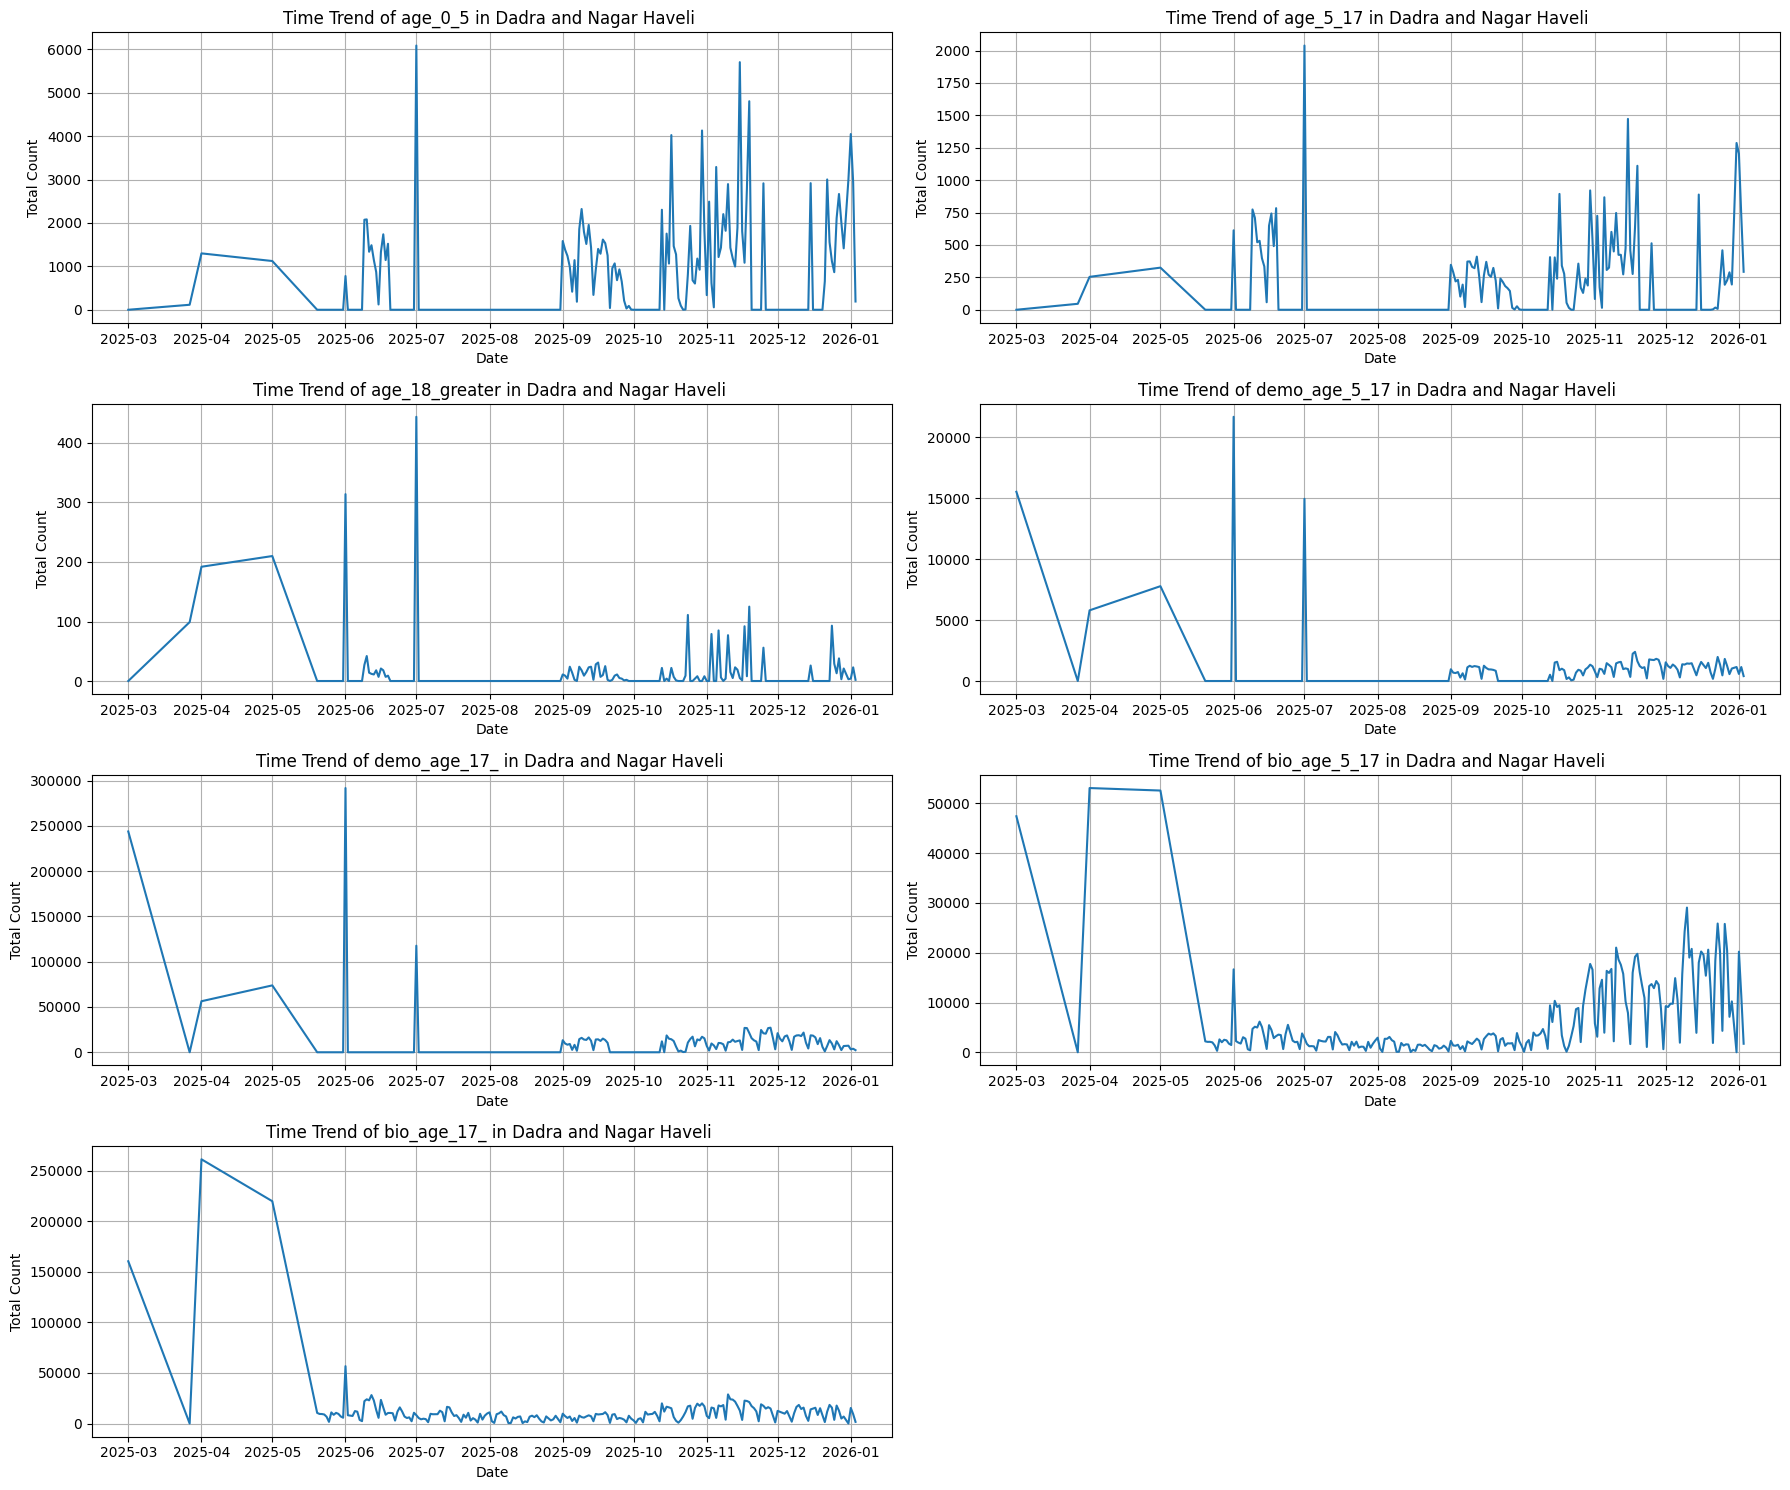

Insight: Line charts for each age-related column over time in Dadra and Nagar Haveli  provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [55]:
print("Time-series aggregated data (sum of age-related columns per date) for Dadra and Nagar Haveli :")
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_chhattisgarh_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Dadra and Nagar Haveli ')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Dadra and Nagar Haveli  provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

Time-series aggregated data (sum of age-related columns per date) for Daman and Diu :


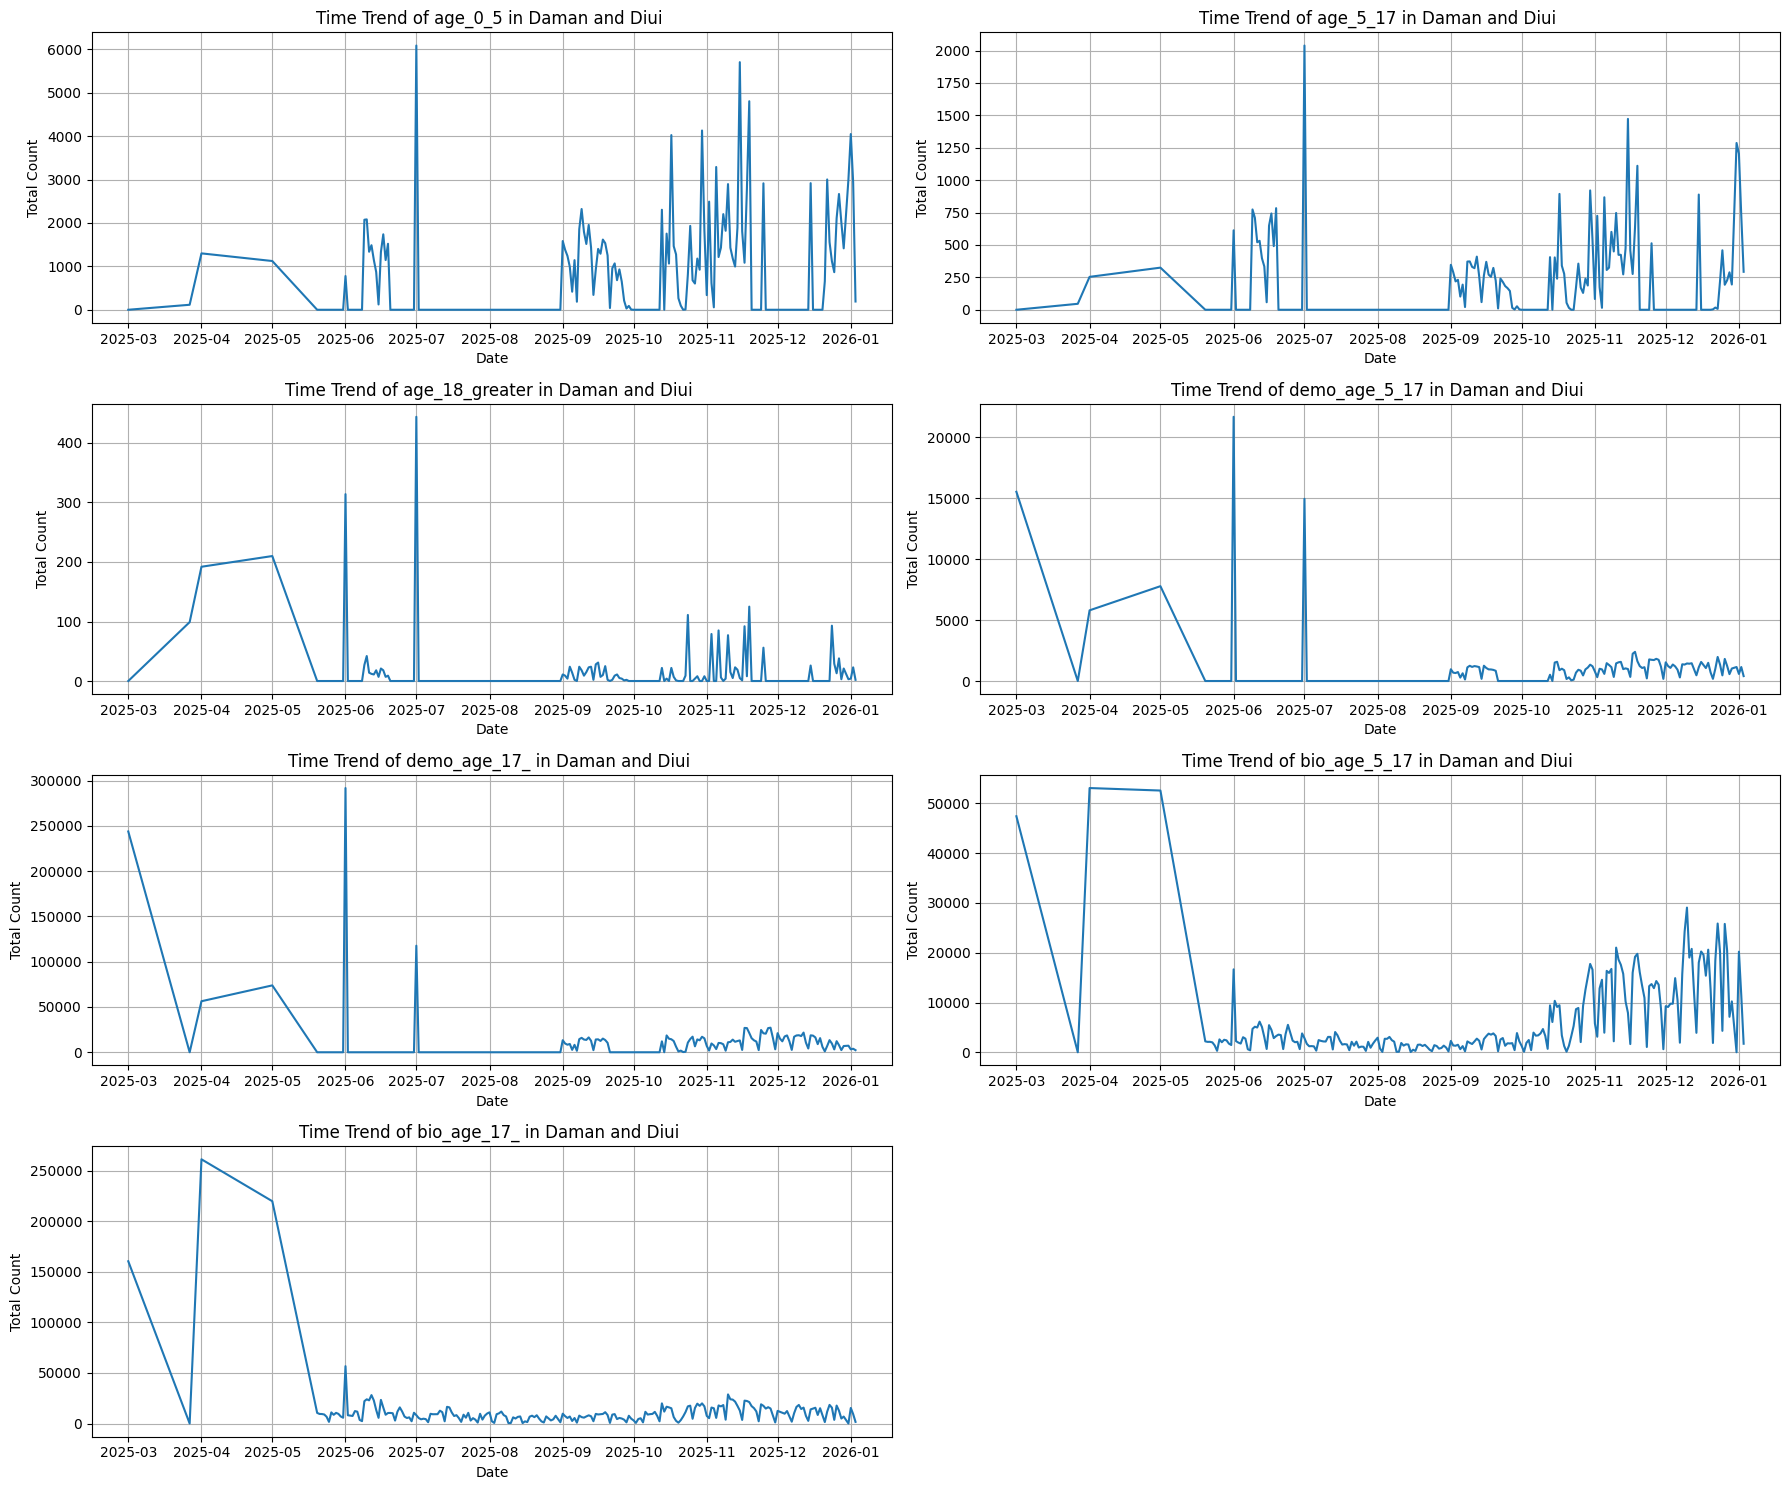

Insight: Line charts for each age-related column over time in Daman and Diu  provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [54]:
print("Time-series aggregated data (sum of age-related columns per date) for Daman and Diu :")
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_chhattisgarh_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Daman and Diui ')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Daman and Diu  provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

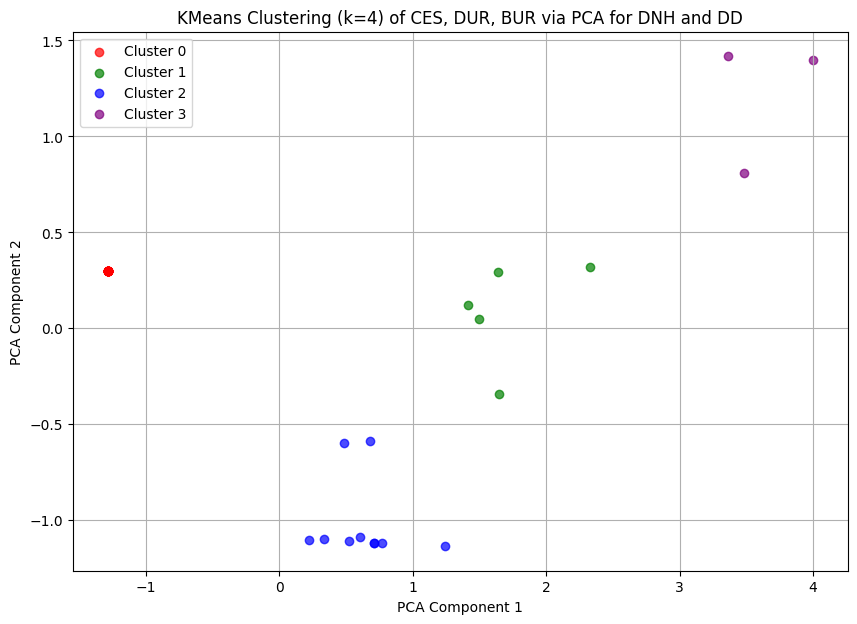

First 5 rows of df_dnh_dd_agg with 'clusterlabel' column:
   year  month                   state                district  age_0_5  \
0  2025      3  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
1  2025      4  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
2  2025      5  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   
3  2025      6  Dadra and Nagar Haveli  Dadra and Nagar Haveli     79.0   
4  2025      7  Dadra and Nagar Haveli  Dadra and Nagar Haveli      0.0   

   age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...  \
0       0.0             0.0            0.0           0.0         932.0  ...   
1       0.0             0.0            0.0           0.0        1320.0  ...   
2       0.0             0.0            0.0           0.0        2077.0  ...   
3      40.0             0.0            0.0           0.0        1192.0  ...   
4       0.0             0.0            0.0           0.0         843.0  ...   

      Bnorm   st

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Concatenate df_dnh_agg and df_dd_agg
df_dnh_dd_agg = pd.concat([df_dnh_agg, df_dd_agg], ignore_index=True)

# 2. Select the 'CES', 'DUR', and 'BUR' columns for clustering
features_for_clustering = df_dnh_dd_agg[['CES', 'DUR', 'BUR']]

# 3. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 4. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# 5. Add the cluster labels to df_dnh_dd_agg
df_dnh_dd_agg['clusterlabel'] = kmeans.labels_

# 6. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# 7. Create a DataFrame for PCA components for easier plotting
pca_df_dnh_dd = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df_dnh_dd['clusterlabel'] = df_dnh_dd_agg['clusterlabel']

# 8. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df_dnh_dd[pca_df_dnh_dd['clusterlabel'] == i]['PCA Component 1'],
        pca_df_dnh_dd[pca_df_dnh_dd['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA for DNH and DD')
plt.legend()
plt.grid(True)
plt.show()

# 9. Print the first 5 rows of df_dnh_dd_agg to show the newly created columns
print("First 5 rows of df_dnh_dd_agg with 'clusterlabel' column:")
print(df_dnh_dd_agg.head())

In [44]:
import pandas as pd

# 1. Find the maximum year in the df_dnh_dd_agg DataFrame
latest_year = df_dnh_dd_agg['year'].max()

# 2. Filter df_dnh_dd_agg for rows corresponding to the latest_year and find the maximum month within that year
latest_month = df_dnh_dd_agg[df_dnh_dd_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period for Dadra and Nagar Haveli and Daman and Diu: Year {latest_year}, Month {latest_month}")

# 3. Filter df_dnh_dd_agg to create a new DataFrame, df_latest_month_dnh_dd
df_latest_month_dnh_dd = df_dnh_dd_agg[(df_dnh_dd_agg['year'] == latest_year) & (df_dnh_dd_agg['month'] == latest_month)].copy()

# 4. Define a list of metrics to analyze
metrics_dnh_dd = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 5. Iterate through each metric in metrics_dnh_dd
for metric in metrics_dnh_dd:
    print(f"\n--- Metric: {metric} ---")

    # For riskscore, top means highest risk, so ascending=False
    # For ALBI, top means best balance, so ascending=False
    # For CES, DUR, BUR, top means best performance, so ascending=False
    top_10_dnh_dd = df_latest_month_dnh_dd.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10_dnh_dd[['district', metric, 'state']].to_string(index=False))

    # For riskscore, bottom means lowest risk, so ascending=True
    # For ALBI, bottom means least balance, so ascending=True
    # For CES, DUR, BUR, bottom means worst performance, so ascending=True
    bottom_10_dnh_dd = df_latest_month_dnh_dd.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10_dnh_dd[['district', metric, 'state']].to_string(index=False))

Latest reporting period for Dadra and Nagar Haveli and Daman and Diu: Year 2026, Month 1

--- Metric: CES ---

Top Districts by CES (Year 2026, Month 1):
              district  CES                  state
Dadra and Nagar Haveli  1.0 Dadra and Nagar Haveli
                 Daman  1.0          Daman and Diu
                   Diu  1.0          Daman and Diu
  Dadra & Nagar Haveli  0.0   Dadra & Nagar Haveli

Bottom Districts by CES (Year 2026, Month 1):
              district  CES                  state
  Dadra & Nagar Haveli  0.0   Dadra & Nagar Haveli
Dadra and Nagar Haveli  1.0 Dadra and Nagar Haveli
                 Daman  1.0          Daman and Diu
                   Diu  1.0          Daman and Diu

--- Metric: DUR ---

Top Districts by DUR (Year 2026, Month 1):
              district  DUR                  state
                 Daman 23.0          Daman and Diu
                   Diu  4.5          Daman and Diu
Dadra and Nagar Haveli  0.0 Dadra and Nagar Haveli
  Dadra & Nagar Have

## Summarize Findings (Dadra and Nagar Haveli and Daman and Diu)

### Subtask:
Provide a comprehensive summary of the analysis for the combined Dadra and Nagar Haveli and Daman and Diu Union Territory, highlighting key observations, district performance, identified anomalies (e.g., in risk score or update rates), insights, and recommendations for further investigation or intervention.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation and Metric Calculation:** All date columns were successfully converted to datetime objects. Enrolment, demographic, and biometric data for Dadra and Nagar Haveli, and Daman and Diu were merged, and missing numerical values were imputed with 0. Key metrics such as total enrolments, child enrolments, demographic updates, and biometric updates were computed, along with performance rates like Child Enrolment Score (CES), Demographic Update Rate (DUR), and Biometric Update Rate (BUR). An Aadhaar Lifecycle Balance Index (ALBI) and a comprehensive risk score (scaled 0-100) were also successfully calculated for all districts.
*   **Correlation in Biometric Updates:** Strong positive correlations were observed between biometric updates for children (age 5-17) and adults (age 17+). Specifically, in Dadra and Nagar Haveli, the correlation between `bio_age_5_17` and `bio_age_17_` was 0.96. In Daman and Diu, this correlation was similarly high at 0.91, suggesting that biometric update activities often occur across age groups concurrently.
*   **Clustering of Districts:** A KMeans clustering analysis (k=4) based on CES, DUR, and BUR metrics for the combined Union Territories revealed distinct groupings of district performance, which were visualized using PCA components. This indicates heterogeneity in operational efficiency or focus areas across different districts over time.
*   **District Performance for Latest Period (Year 2026, Month 1):**
    *   **Child Enrolment Score (CES):** Dadra and Nagar Haveli, Daman, and Diu all showed a perfect CES of 1.0, while "Dadra & Nagar Haveli" registered 0.0.
    *   **Demographic Update Rate (DUR):** Daman led with 23.0, followed by Diu at 4.5. Both 'Dadra & Nagar Haveli' and 'Dadra and Nagar Haveli' districts recorded a DUR of 0.0.
    *   **Biometric Update Rate (BUR):** Daman had the highest BUR at 72.00. "Dadra and Nagar Haveli" recorded 12.55, and "Dadra & Nagar Haveli" showed 0.00.
    *   **Aadhaar Lifecycle Balance Index (ALBI):** "Dadra & Nagar Haveli" and "Dadra and Nagar Haveli" achieved the highest ALBI of 1.0, indicating optimal balance. Daman had the lowest ALBI at 0.33.
    *   **Risk Score:** "Dadra & Nagar Haveli" showed the highest risk at 80.00. Notably, Daman registered the lowest (most favorable) risk score at -1826.67.

### Insights or Next Steps

*   **Investigate Discrepancies in Update Rates:** The significantly low or zero Demographic Update Rates (DUR) and Biometric Update Rates (BUR) in districts like 'Dadra & Nagar Haveli' warrant further investigation. Understanding the underlying causes (e.g., data quality issues, operational bottlenecks, or actual low activity) is crucial.
*   **Re-evaluate Risk Score Interpretation:** The occurrence of negative risk scores, particularly the very low score for Daman (-1826.67), suggests a need to review the risk score calculation methodology or its interpretation. While intended to scale from 0-100, these negative values indicate a potential issue with how the component risk normalizations combine or how "low risk" is represented.
